# 📊 Notebook 1 : Prétraitement des Données
## Ames Housing Dataset - Prédiction des Prix Immobiliers

---

### 📋 Table des Matières
1. [Configuration et Imports](#1-configuration-et-imports)
2. [Chargement des Données](#2-chargement-des-données)
3. [Analyse de la Qualité des Données](#3-analyse-de-la-qualité-des-données)
4. [Gestion des Valeurs Manquantes](#4-gestion-des-valeurs-manquantes)
5. [Encodage des Variables Catégorielles](#5-encodage-des-variables-catégorielles)
6. [Feature Engineering](#6-feature-engineering)
7. [Traitement des Outliers](#7-traitement-des-outliers)
8. [Normalisation et Standardisation](#8-normalisation-et-standardisation)
9. [Sauvegarde des Données](#9-sauvegarde-des-données)
10. [Résumé et Conclusions](#10-résumé-et-conclusions)

---

### 🎯 Objectif
Ce notebook prépare les données du dataset Ames Housing pour l'analyse et la modélisation. 
Nous allons nettoyer, transformer et créer de nouvelles features pour optimiser les performances des modèles de prédiction.

**Auteur** : Projet ML Ames Housing  
**Date** : 2025

---
## 1. Configuration et Imports

In [1]:
# =============================================================================
# IMPORTS ET CONFIGURATION
# =============================================================================

# Manipulation des données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Prétraitement
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# Utilitaires
import pickle
import warnings
import os
from scipy import stats

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Seed pour reproductibilité
np.random.seed(42)

# Style des graphiques
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("✅ Bibliothèques chargées avec succès!")
print(f"📦 Pandas version: {pd.__version__}")
print(f"📦 NumPy version: {np.__version__}")

✅ Bibliothèques chargées avec succès!
📦 Pandas version: 2.2.3
📦 NumPy version: 2.2.1


---
## 2. Chargement des Données

In [2]:
# =============================================================================
# CHARGEMENT DES DONNÉES
# =============================================================================

# Chemin vers les données
DATA_PATH = '../data/'

# Chargement du fichier train.csv (contient SalePrice)
df = pd.read_csv(DATA_PATH + 'train.csv')

print("="*60)
print("📂 CHARGEMENT DES DONNÉES")
print("="*60)
print(f"\n📊 Dimensions du dataset: {df.shape[0]} lignes × {df.shape[1]} colonnes")
print(f"\n📋 Liste des colonnes ({len(df.columns)} features):")
print(df.columns.tolist())

📂 CHARGEMENT DES DONNÉES

📊 Dimensions du dataset: 1460 lignes × 81 colonnes

📋 Liste des colonnes (81 features):
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageC

In [3]:
# Aperçu des premières lignes
print("\n🔍 Aperçu des 5 premières lignes:")
df.head()


🔍 Aperçu des 5 premières lignes:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Informations générales sur le dataset
print("\n📋 Informations sur les types de données:")
df.info()


📋 Informations sur les types de données:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQua

In [5]:
# Séparation des types de variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Retirer Id et SalePrice des features numériques
if 'Id' in numerical_cols:
    numerical_cols.remove('Id')
if 'SalePrice' in numerical_cols:
    numerical_cols.remove('SalePrice')

print(f"\n📊 Variables numériques ({len(numerical_cols)}): {numerical_cols[:10]}...")
print(f"\n📝 Variables catégorielles ({len(categorical_cols)}): {categorical_cols[:10]}...")


📊 Variables numériques (36): ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2']...

📝 Variables catégorielles (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1']...


---
## 3. Analyse de la Qualité des Données

### 3.1 Analyse des Valeurs Manquantes

In [6]:
# =============================================================================
# ANALYSE DES VALEURS MANQUANTES
# =============================================================================

# Calcul des valeurs manquantes
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# DataFrame des valeurs manquantes
missing_df = pd.DataFrame({
    'Colonne': missing_values.index,
    'Valeurs_Manquantes': missing_values.values,
    'Pourcentage': missing_percent.values
})

# Filtrer les colonnes avec des valeurs manquantes
missing_df = missing_df[missing_df['Valeurs_Manquantes'] > 0]
missing_df = missing_df.sort_values('Pourcentage', ascending=False)

print("="*60)
print("🔍 ANALYSE DES VALEURS MANQUANTES")
print("="*60)
print(f"\n📊 Nombre de colonnes avec des valeurs manquantes: {len(missing_df)}")
print(f"\n{missing_df.to_string(index=False)}")

🔍 ANALYSE DES VALEURS MANQUANTES

📊 Nombre de colonnes avec des valeurs manquantes: 19

     Colonne  Valeurs_Manquantes  Pourcentage
      PoolQC                1453        99.52
 MiscFeature                1406        96.30
       Alley                1369        93.77
       Fence                1179        80.75
  MasVnrType                 872        59.73
 FireplaceQu                 690        47.26
 LotFrontage                 259        17.74
  GarageType                  81         5.55
 GarageYrBlt                  81         5.55
GarageFinish                  81         5.55
  GarageQual                  81         5.55
  GarageCond                  81         5.55
BsmtFinType2                  38         2.60
BsmtExposure                  38         2.60
BsmtFinType1                  37         2.53
    BsmtCond                  37         2.53
    BsmtQual                  37         2.53
  MasVnrArea                   8         0.55
  Electrical                   1      

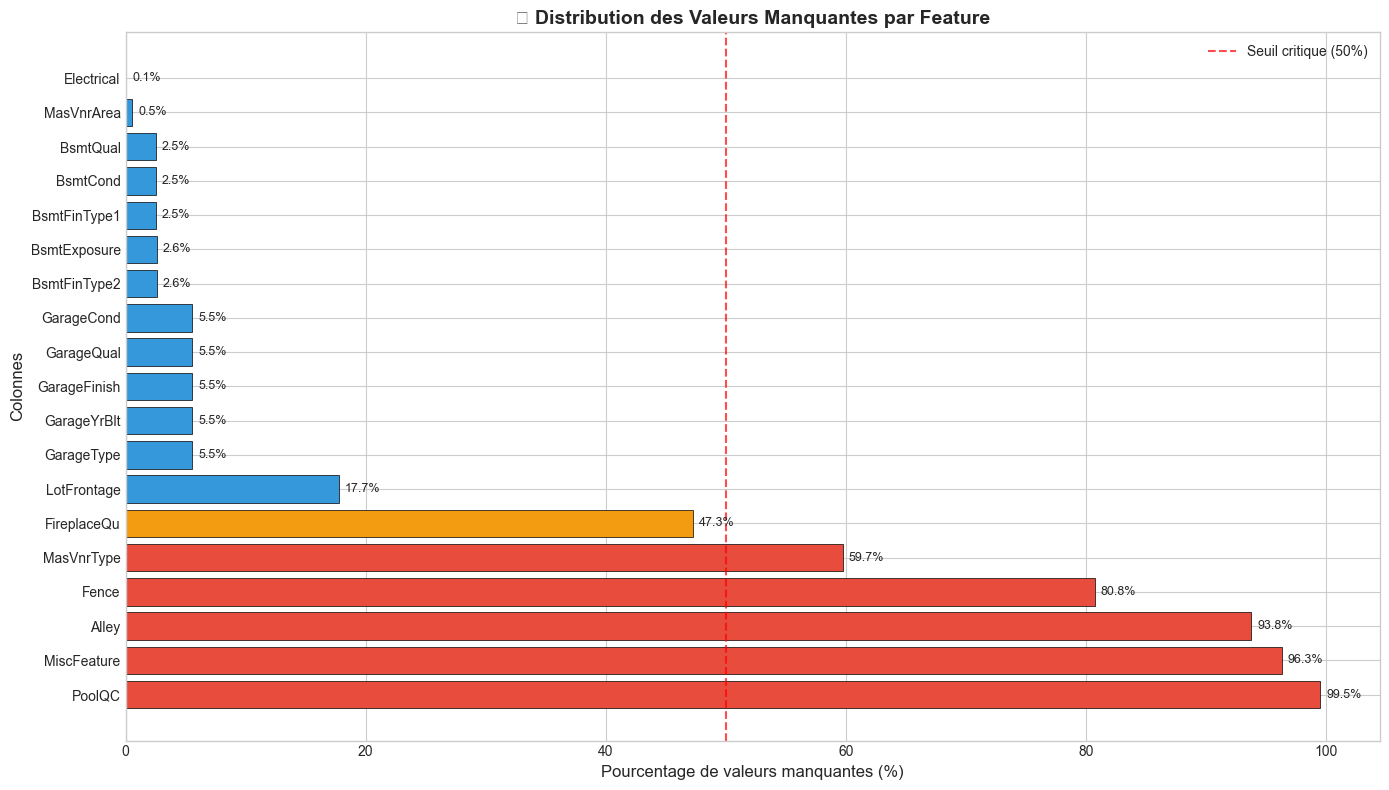

In [7]:
# Visualisation des valeurs manquantes
fig, ax = plt.subplots(figsize=(14, 8))

# Barplot des valeurs manquantes
colors = ['#e74c3c' if x > 50 else '#f39c12' if x > 20 else '#3498db' for x in missing_df['Pourcentage']]
bars = ax.barh(missing_df['Colonne'], missing_df['Pourcentage'], color=colors, edgecolor='black', linewidth=0.5)

# Annotations
for bar, val in zip(bars, missing_df['Pourcentage']):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
            f'{val:.1f}%', va='center', fontsize=9)

ax.set_xlabel('Pourcentage de valeurs manquantes (%)', fontsize=12)
ax.set_ylabel('Colonnes', fontsize=12)
ax.set_title('📊 Distribution des Valeurs Manquantes par Feature', fontsize=14, fontweight='bold')
ax.axvline(x=50, color='red', linestyle='--', alpha=0.7, label='Seuil critique (50%)')
ax.legend()

plt.tight_layout()
plt.show()

### 3.2 Analyse des Doublons

In [8]:
# =============================================================================
# DÉTECTION DES DOUBLONS
# =============================================================================

duplicates = df.duplicated().sum()
print(f"\n🔍 Nombre de lignes dupliquées: {duplicates}")

if duplicates > 0:
    print("⚠️ Des doublons ont été détectés!")
else:
    print("✅ Aucun doublon détecté dans le dataset.")


🔍 Nombre de lignes dupliquées: 0
✅ Aucun doublon détecté dans le dataset.


### 3.3 Détection des Outliers

In [9]:
# =============================================================================
# DÉTECTION PRÉLIMINAIRE DES OUTLIERS
# =============================================================================

def detect_outliers_iqr(data, column):
    """Détecte les outliers en utilisant la méthode IQR."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

# Analyse des outliers pour les principales variables numériques
key_numeric_cols = ['LotFrontage', 'LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']

print("="*60)
print("📊 DÉTECTION PRÉLIMINAIRE DES OUTLIERS (Méthode IQR)")
print("="*60)

outlier_summary = []
for col in key_numeric_cols:
    if col in df.columns:
        n_outliers = detect_outliers_iqr(df, col)
        pct = (n_outliers / len(df)) * 100
        outlier_summary.append({'Colonne': col, 'Outliers': n_outliers, 'Pourcentage': f'{pct:.2f}%'})

outlier_df = pd.DataFrame(outlier_summary)
print(f"\n{outlier_df.to_string(index=False)}")

📊 DÉTECTION PRÉLIMINAIRE DES OUTLIERS (Méthode IQR)

    Colonne  Outliers Pourcentage
LotFrontage        88       6.03%
    LotArea        69       4.73%
  GrLivArea        31       2.12%
TotalBsmtSF        61       4.18%
 GarageArea        21       1.44%
  SalePrice        61       4.18%


---
## 4. Gestion des Valeurs Manquantes

### Stratégie :
- **NA sémantiques** : Certaines valeurs NA signifient "absence de la caractéristique" (ex: pas de garage = GarageType = NA)
- **Vraies valeurs manquantes** : Doivent être imputées (ex: LotFrontage)

In [10]:
# =============================================================================
# DÉFINITION DES COLONNES AVEC NA SÉMANTIQUES
# =============================================================================

# Variables où NA signifie "Absence de la caractéristique" -> Remplacer par 'None'
na_semantic_none = [
    'Alley',          # NA = Pas d'allée
    'BsmtQual',       # NA = Pas de sous-sol
    'BsmtCond',       # NA = Pas de sous-sol
    'BsmtExposure',   # NA = Pas de sous-sol
    'BsmtFinType1',   # NA = Pas de sous-sol
    'BsmtFinType2',   # NA = Pas de sous-sol
    'FireplaceQu',    # NA = Pas de cheminée
    'GarageType',     # NA = Pas de garage
    'GarageFinish',   # NA = Pas de garage
    'GarageQual',     # NA = Pas de garage
    'GarageCond',     # NA = Pas de garage
    'PoolQC',         # NA = Pas de piscine
    'Fence',          # NA = Pas de clôture
    'MiscFeature'     # NA = Pas de caractéristique spéciale
]

# Variables numériques où NA signifie 0
na_semantic_zero = [
    'GarageYrBlt',    # NA = Pas de garage -> 0
    'MasVnrArea',     # NA = Pas de placage -> 0
    'BsmtFinSF1',     # NA = Pas de sous-sol -> 0
    'BsmtFinSF2',     # NA = Pas de sous-sol -> 0
    'BsmtUnfSF',      # NA = Pas de sous-sol -> 0
    'TotalBsmtSF',    # NA = Pas de sous-sol -> 0
    'BsmtFullBath',   # NA = Pas de sous-sol -> 0
    'BsmtHalfBath',   # NA = Pas de sous-sol -> 0
    'GarageCars',     # NA = Pas de garage -> 0
    'GarageArea'      # NA = Pas de garage -> 0
]

print("📋 Colonnes avec NA sémantiques (None): ", len(na_semantic_none))
print("📋 Colonnes avec NA sémantiques (0): ", len(na_semantic_zero))

📋 Colonnes avec NA sémantiques (None):  14
📋 Colonnes avec NA sémantiques (0):  10


In [11]:
# =============================================================================
# TRAITEMENT DES VALEURS MANQUANTES
# =============================================================================

# Copie du dataframe
df_processed = df.copy()

# 1. Traitement des NA sémantiques (catégorielles -> 'None')
for col in na_semantic_none:
    if col in df_processed.columns:
        df_processed[col].fillna('None', inplace=True)
        print(f"✅ {col}: NA remplacés par 'None'")

# 2. Traitement des NA sémantiques (numériques -> 0)
for col in na_semantic_zero:
    if col in df_processed.columns:
        df_processed[col].fillna(0, inplace=True)
        print(f"✅ {col}: NA remplacés par 0")

✅ Alley: NA remplacés par 'None'
✅ BsmtQual: NA remplacés par 'None'
✅ BsmtCond: NA remplacés par 'None'
✅ BsmtExposure: NA remplacés par 'None'
✅ BsmtFinType1: NA remplacés par 'None'
✅ BsmtFinType2: NA remplacés par 'None'
✅ FireplaceQu: NA remplacés par 'None'
✅ GarageType: NA remplacés par 'None'
✅ GarageFinish: NA remplacés par 'None'
✅ GarageQual: NA remplacés par 'None'
✅ GarageCond: NA remplacés par 'None'
✅ PoolQC: NA remplacés par 'None'
✅ Fence: NA remplacés par 'None'
✅ MiscFeature: NA remplacés par 'None'
✅ GarageYrBlt: NA remplacés par 0
✅ MasVnrArea: NA remplacés par 0
✅ BsmtFinSF1: NA remplacés par 0
✅ BsmtFinSF2: NA remplacés par 0
✅ BsmtUnfSF: NA remplacés par 0
✅ TotalBsmtSF: NA remplacés par 0
✅ BsmtFullBath: NA remplacés par 0
✅ BsmtHalfBath: NA remplacés par 0
✅ GarageCars: NA remplacés par 0
✅ GarageArea: NA remplacés par 0


In [12]:
# 3. LotFrontage: Imputation par la médiane du quartier (Neighborhood)
if df_processed['LotFrontage'].isnull().sum() > 0:
    df_processed['LotFrontage'] = df_processed.groupby('Neighborhood')['LotFrontage'].transform(
        lambda x: x.fillna(x.median())
    )
    # S'il reste des NA, utiliser la médiane globale
    df_processed['LotFrontage'].fillna(df_processed['LotFrontage'].median(), inplace=True)
    print("✅ LotFrontage: Imputé par la médiane du quartier")

# 4. MasVnrType: NA -> 'None'
if 'MasVnrType' in df_processed.columns:
    df_processed['MasVnrType'].fillna('None', inplace=True)
    print("✅ MasVnrType: NA remplacés par 'None'")

# 5. Electrical: Imputation par le mode (la valeur la plus fréquente)
if 'Electrical' in df_processed.columns and df_processed['Electrical'].isnull().sum() > 0:
    df_processed['Electrical'].fillna(df_processed['Electrical'].mode()[0], inplace=True)
    print("✅ Electrical: Imputé par le mode")

✅ LotFrontage: Imputé par la médiane du quartier
✅ MasVnrType: NA remplacés par 'None'
✅ Electrical: Imputé par le mode


In [13]:
# Vérification finale des valeurs manquantes
remaining_missing = df_processed.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0]

print("\n" + "="*60)
print("📊 VÉRIFICATION APRÈS TRAITEMENT DES NA")
print("="*60)

if len(remaining_missing) == 0:
    print("\n✅ Toutes les valeurs manquantes ont été traitées!")
else:
    print(f"\n⚠️ Colonnes avec des valeurs manquantes restantes:")
    print(remaining_missing)


📊 VÉRIFICATION APRÈS TRAITEMENT DES NA

✅ Toutes les valeurs manquantes ont été traitées!


---
## 5. Encodage des Variables Catégorielles

In [14]:
# =============================================================================
# ENCODAGE DES VARIABLES ORDINALES
# =============================================================================

# Mapping pour les variables de qualité/condition (ordinales)
quality_mapping = {
    'Ex': 5,   # Excellent
    'Gd': 4,   # Good
    'TA': 3,   # Typical/Average
    'Fa': 2,   # Fair
    'Po': 1,   # Poor
    'None': 0  # No feature
}

# Liste des colonnes ordinales de qualité/condition
ordinal_quality_cols = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
    'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC'
]

# Application du mapping
for col in ordinal_quality_cols:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].map(quality_mapping)
        print(f"✅ {col}: Encodé avec mapping ordinal (Ex=5, Gd=4, TA=3, Fa=2, Po=1, None=0)")

✅ ExterQual: Encodé avec mapping ordinal (Ex=5, Gd=4, TA=3, Fa=2, Po=1, None=0)
✅ ExterCond: Encodé avec mapping ordinal (Ex=5, Gd=4, TA=3, Fa=2, Po=1, None=0)
✅ BsmtQual: Encodé avec mapping ordinal (Ex=5, Gd=4, TA=3, Fa=2, Po=1, None=0)
✅ BsmtCond: Encodé avec mapping ordinal (Ex=5, Gd=4, TA=3, Fa=2, Po=1, None=0)
✅ HeatingQC: Encodé avec mapping ordinal (Ex=5, Gd=4, TA=3, Fa=2, Po=1, None=0)
✅ KitchenQual: Encodé avec mapping ordinal (Ex=5, Gd=4, TA=3, Fa=2, Po=1, None=0)
✅ FireplaceQu: Encodé avec mapping ordinal (Ex=5, Gd=4, TA=3, Fa=2, Po=1, None=0)
✅ GarageQual: Encodé avec mapping ordinal (Ex=5, Gd=4, TA=3, Fa=2, Po=1, None=0)
✅ GarageCond: Encodé avec mapping ordinal (Ex=5, Gd=4, TA=3, Fa=2, Po=1, None=0)
✅ PoolQC: Encodé avec mapping ordinal (Ex=5, Gd=4, TA=3, Fa=2, Po=1, None=0)


In [15]:
# Autres mappings ordinaux spécifiques

# BsmtExposure
bsmt_exposure_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0}
if 'BsmtExposure' in df_processed.columns:
    df_processed['BsmtExposure'] = df_processed['BsmtExposure'].map(bsmt_exposure_map)
    print("✅ BsmtExposure: Encodé")

# BsmtFinType1 et BsmtFinType2
bsmt_fin_map = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0}
for col in ['BsmtFinType1', 'BsmtFinType2']:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].map(bsmt_fin_map)
        print(f"✅ {col}: Encodé")

# GarageFinish
garage_finish_map = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0}
if 'GarageFinish' in df_processed.columns:
    df_processed['GarageFinish'] = df_processed['GarageFinish'].map(garage_finish_map)
    print("✅ GarageFinish: Encodé")

# Fence
fence_map = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'None': 0}
if 'Fence' in df_processed.columns:
    df_processed['Fence'] = df_processed['Fence'].map(fence_map)
    print("✅ Fence: Encodé")

# Functional
functional_map = {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0}
if 'Functional' in df_processed.columns:
    df_processed['Functional'] = df_processed['Functional'].map(functional_map)
    print("✅ Functional: Encodé")

# LotShape
lot_shape_map = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}
if 'LotShape' in df_processed.columns:
    df_processed['LotShape'] = df_processed['LotShape'].map(lot_shape_map)
    print("✅ LotShape: Encodé")

# LandSlope
land_slope_map = {'Gtl': 3, 'Mod': 2, 'Sev': 1}
if 'LandSlope' in df_processed.columns:
    df_processed['LandSlope'] = df_processed['LandSlope'].map(land_slope_map)
    print("✅ LandSlope: Encodé")

# PavedDrive
paved_drive_map = {'Y': 2, 'P': 1, 'N': 0}
if 'PavedDrive' in df_processed.columns:
    df_processed['PavedDrive'] = df_processed['PavedDrive'].map(paved_drive_map)
    print("✅ PavedDrive: Encodé")

✅ BsmtExposure: Encodé
✅ BsmtFinType1: Encodé
✅ BsmtFinType2: Encodé
✅ GarageFinish: Encodé
✅ Fence: Encodé
✅ Functional: Encodé
✅ LotShape: Encodé
✅ LandSlope: Encodé
✅ PavedDrive: Encodé


In [16]:
# =============================================================================
# ENCODAGE DES VARIABLES NOMINALES (One-Hot / Label Encoding)
# =============================================================================

# Colonnes catégorielles restantes (nominales)
remaining_cat_cols = df_processed.select_dtypes(include=['object']).columns.tolist()

print(f"\n📋 Colonnes catégorielles à encoder en One-Hot: {len(remaining_cat_cols)}")
print(remaining_cat_cols)

# Pour les colonnes avec cardinalité élevée, on utilise Label Encoding
# Pour les autres, One-Hot Encoding

high_cardinality_cols = []  # Colonnes avec > 10 catégories
low_cardinality_cols = []   # Colonnes avec <= 10 catégories

for col in remaining_cat_cols:
    n_unique = df_processed[col].nunique()
    if n_unique > 10:
        high_cardinality_cols.append(col)
    else:
        low_cardinality_cols.append(col)

print(f"\n📊 Cardinalité élevée (>10): {high_cardinality_cols}")
print(f"📊 Cardinalité faible (<=10): {len(low_cardinality_cols)} colonnes")


📋 Colonnes catégorielles à encoder en One-Hot: 24
['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']

📊 Cardinalité élevée (>10): ['Neighborhood', 'Exterior1st', 'Exterior2nd']
📊 Cardinalité faible (<=10): 21 colonnes


In [17]:
# Label Encoding pour colonnes à forte cardinalité (comme Neighborhood)
label_encoders = {}

for col in high_cardinality_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col].astype(str))
    label_encoders[col] = le
    print(f"✅ {col}: Label Encoding appliqué ({le.classes_.shape[0]} catégories)")

# One-Hot Encoding pour colonnes à faible cardinalité
df_processed = pd.get_dummies(df_processed, columns=low_cardinality_cols, drop_first=True)
print(f"\n✅ One-Hot Encoding appliqué aux {len(low_cardinality_cols)} colonnes restantes")
print(f"\n📊 Nouvelles dimensions: {df_processed.shape}")

✅ Neighborhood: Label Encoding appliqué (25 catégories)
✅ Exterior1st: Label Encoding appliqué (15 catégories)
✅ Exterior2nd: Label Encoding appliqué (16 catégories)

✅ One-Hot Encoding appliqué aux 21 colonnes restantes

📊 Nouvelles dimensions: (1460, 154)


---
## 6. Feature Engineering

In [18]:
# =============================================================================
# CRÉATION DE NOUVELLES FEATURES
# =============================================================================

print("="*60)
print("🔧 FEATURE ENGINEERING")
print("="*60)

# 1. Surface totale habitable
df_processed['TotalSF'] = df_processed['TotalBsmtSF'] + df_processed['1stFlrSF'] + df_processed['2ndFlrSF']
print("✅ TotalSF = TotalBsmtSF + 1stFlrSF + 2ndFlrSF")

# 2. Nombre total de salles de bains
df_processed['TotalBathrooms'] = (df_processed['FullBath'] + 
                                   0.5 * df_processed['HalfBath'] + 
                                   df_processed['BsmtFullBath'] + 
                                   0.5 * df_processed['BsmtHalfBath'])
print("✅ TotalBathrooms = FullBath + 0.5*HalfBath + BsmtFullBath + 0.5*BsmtHalfBath")

# 3. Âge de la maison au moment de la vente
df_processed['HouseAge'] = df_processed['YrSold'] - df_processed['YearBuilt']
print("✅ HouseAge = YrSold - YearBuilt")

# 4. Années depuis la dernière rénovation
df_processed['RemodAge'] = df_processed['YrSold'] - df_processed['YearRemodAdd']
print("✅ RemodAge = YrSold - YearRemodAdd")

# 5. Surface totale du porche
df_processed['TotalPorchSF'] = (df_processed['OpenPorchSF'] + 
                                 df_processed['EnclosedPorch'] + 
                                 df_processed['3SsnPorch'] + 
                                 df_processed['ScreenPorch'])
print("✅ TotalPorchSF = OpenPorchSF + EnclosedPorch + 3SsnPorch + ScreenPorch")

# 6. Variable binaire: A une piscine
df_processed['HasPool'] = (df_processed['PoolArea'] > 0).astype(int)
print("✅ HasPool = (PoolArea > 0)")

# 7. Variable binaire: A un garage
df_processed['HasGarage'] = (df_processed['GarageArea'] > 0).astype(int)
print("✅ HasGarage = (GarageArea > 0)")

# 8. Variable binaire: A un sous-sol
df_processed['HasBasement'] = (df_processed['TotalBsmtSF'] > 0).astype(int)
print("✅ HasBasement = (TotalBsmtSF > 0)")

# 9. Variable binaire: A une cheminée
df_processed['HasFireplace'] = (df_processed['Fireplaces'] > 0).astype(int)
print("✅ HasFireplace = (Fireplaces > 0)")

# 10. Variable binaire: Rénovée récemment
df_processed['RecentlyRemodeled'] = (df_processed['RemodAge'] <= 5).astype(int)
print("✅ RecentlyRemodeled = (RemodAge <= 5)")

# 11. Variable binaire: Maison neuve
df_processed['IsNew'] = (df_processed['HouseAge'] <= 2).astype(int)
print("✅ IsNew = (HouseAge <= 2)")

# 12. Interaction: Qualité × Surface
df_processed['QualityArea'] = df_processed['OverallQual'] * df_processed['GrLivArea']
print("✅ QualityArea = OverallQual × GrLivArea")

print(f"\n📊 Dimensions après Feature Engineering: {df_processed.shape}")

🔧 FEATURE ENGINEERING
✅ TotalSF = TotalBsmtSF + 1stFlrSF + 2ndFlrSF
✅ TotalBathrooms = FullBath + 0.5*HalfBath + BsmtFullBath + 0.5*BsmtHalfBath
✅ HouseAge = YrSold - YearBuilt
✅ RemodAge = YrSold - YearRemodAdd
✅ TotalPorchSF = OpenPorchSF + EnclosedPorch + 3SsnPorch + ScreenPorch
✅ HasPool = (PoolArea > 0)
✅ HasGarage = (GarageArea > 0)
✅ HasBasement = (TotalBsmtSF > 0)
✅ HasFireplace = (Fireplaces > 0)
✅ RecentlyRemodeled = (RemodAge <= 5)
✅ IsNew = (HouseAge <= 2)
✅ QualityArea = OverallQual × GrLivArea

📊 Dimensions après Feature Engineering: (1460, 166)


---
## 7. Traitement des Outliers

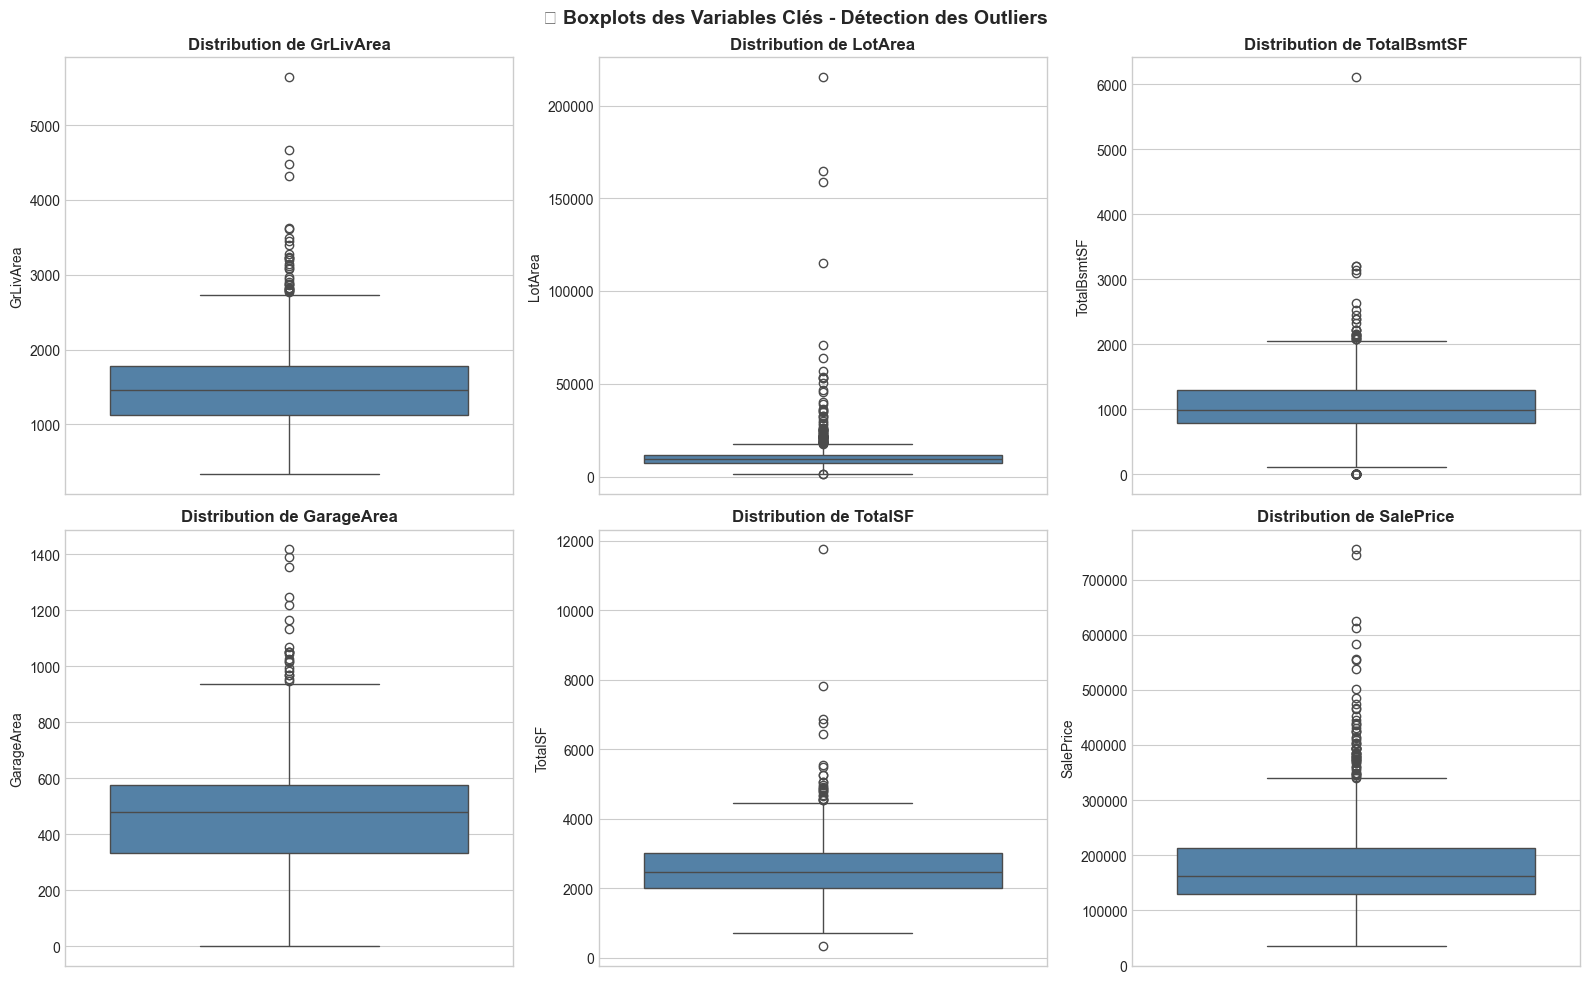

In [19]:
# =============================================================================
# VISUALISATION DES OUTLIERS CLÉS
# =============================================================================

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

outlier_cols = ['GrLivArea', 'LotArea', 'TotalBsmtSF', 'GarageArea', 'TotalSF', 'SalePrice']

for idx, col in enumerate(outlier_cols):
    ax = axes[idx // 3, idx % 3]
    if col in df_processed.columns:
        sns.boxplot(data=df_processed, y=col, ax=ax, color='steelblue')
        ax.set_title(f'Distribution de {col}', fontweight='bold')
        ax.set_ylabel(col)

plt.suptitle('📊 Boxplots des Variables Clés - Détection des Outliers', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

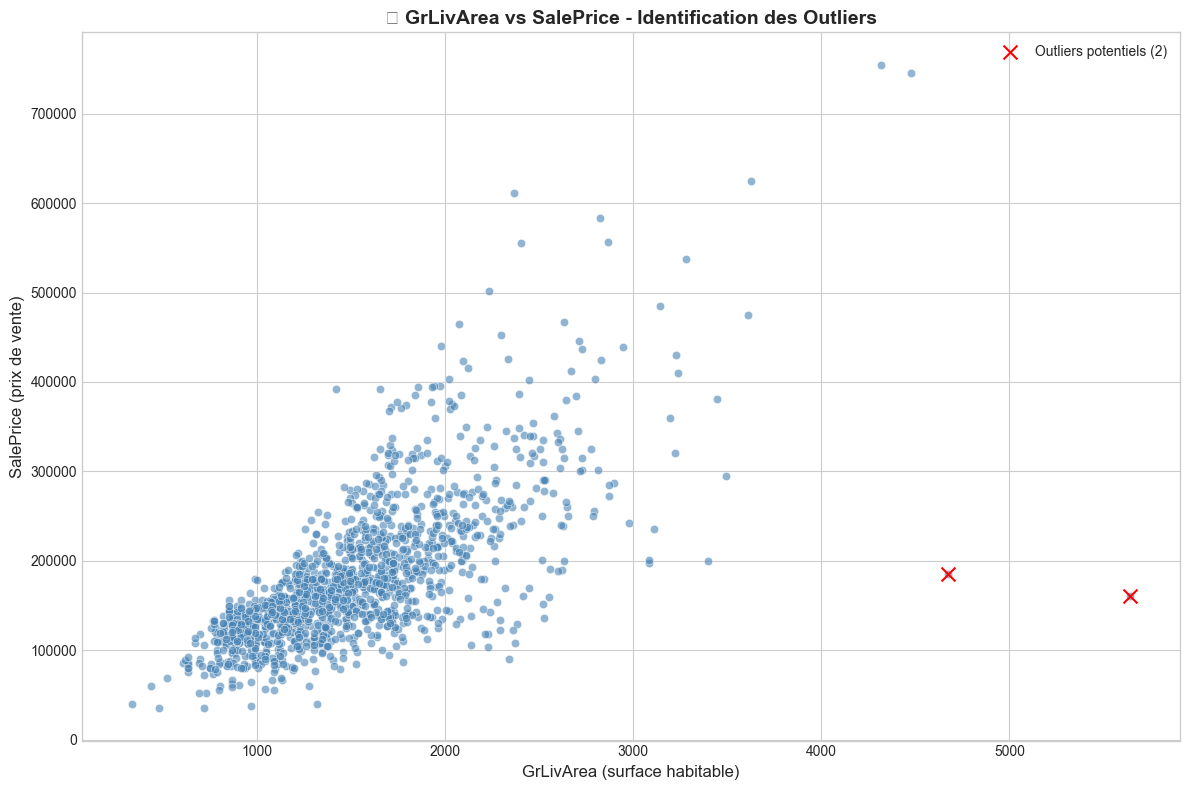

In [20]:
# =============================================================================
# SCATTER PLOT: GrLivArea vs SalePrice (Outliers connus)
# =============================================================================

fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(df_processed['GrLivArea'], df_processed['SalePrice'], 
           alpha=0.6, c='steelblue', edgecolor='white', linewidth=0.5)

# Marquer les outliers connus (grande surface, prix bas)
outliers = df_processed[(df_processed['GrLivArea'] > 4000) & (df_processed['SalePrice'] < 300000)]
ax.scatter(outliers['GrLivArea'], outliers['SalePrice'], 
           c='red', s=100, marker='x', label=f'Outliers potentiels ({len(outliers)})')

ax.set_xlabel('GrLivArea (surface habitable)', fontsize=12)
ax.set_ylabel('SalePrice (prix de vente)', fontsize=12)
ax.set_title('🔍 GrLivArea vs SalePrice - Identification des Outliers', fontsize=14, fontweight='bold')
ax.legend()

plt.tight_layout()
plt.show()

In [21]:
# =============================================================================
# SUPPRESSION DES OUTLIERS EXTRÊMES
# =============================================================================

print("="*60)
print("🔧 TRAITEMENT DES OUTLIERS")
print("="*60)

n_before = len(df_processed)

# Supprimer les maisons avec GrLivArea > 4000 et SalePrice < 300000
# Ce sont des outliers connus du dataset Ames Housing
df_processed = df_processed[~((df_processed['GrLivArea'] > 4000) & (df_processed['SalePrice'] < 300000))]

n_after = len(df_processed)

print(f"\n📊 Lignes avant suppression: {n_before}")
print(f"📊 Lignes après suppression: {n_after}")
print(f"📊 Outliers supprimés: {n_before - n_after}")
print("\n💡 Décision: Ces maisons ont une très grande surface mais un prix anormalement bas.")
print("   Elles peuvent fausser les modèles de prédiction.")

🔧 TRAITEMENT DES OUTLIERS

📊 Lignes avant suppression: 1460
📊 Lignes après suppression: 1458
📊 Outliers supprimés: 2

💡 Décision: Ces maisons ont une très grande surface mais un prix anormalement bas.
   Elles peuvent fausser les modèles de prédiction.


---
## 8. Normalisation et Standardisation

In [22]:
# =============================================================================
# ANALYSE DES DISTRIBUTIONS (SKEWNESS)
# =============================================================================

# Sélectionner les colonnes numériques (exclure Id et colonnes binaires One-Hot)
numeric_features = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclure les colonnes binaires (0/1 only)
numeric_for_transform = []
for col in numeric_features:
    if col not in ['Id', 'SalePrice']:
        unique_vals = df_processed[col].nunique()
        if unique_vals > 2:  # Pas binaire
            numeric_for_transform.append(col)

# Calculer le skewness
skewness = df_processed[numeric_for_transform].apply(lambda x: stats.skew(x.dropna()))
skewness = skewness.sort_values(ascending=False)

# Colonnes très skewed (|skewness| > 0.75)
highly_skewed = skewness[abs(skewness) > 0.75]

print("="*60)
print("📊 ANALYSE DU SKEWNESS (Asymétrie)")
print("="*60)
print(f"\n📋 Variables très asymétriques (|skew| > 0.75): {len(highly_skewed)}")
print(f"\n{highly_skewed.head(20)}")

📊 ANALYSE DU SKEWNESS (Asymétrie)

📋 Variables très asymétriques (|skew| > 0.75): 38

MiscVal         24.43
PoolQC          17.54
PoolArea        15.93
LotArea         12.56
3SsnPorch       10.29
LowQualFinSF     9.00
KitchenAbvGr     4.48
BsmtFinSF2       4.25
ScreenPorch      4.11
BsmtHalfBath     4.10
BsmtFinType2     3.29
EnclosedPorch    3.08
MasVnrArea       2.69
OpenPorchSF      2.34
TotalPorchSF     2.01
Fence            1.80
LotFrontage      1.55
WoodDeckSF       1.54
QualityArea      1.49
MSSubClass       1.41
dtype: float64


In [23]:
# =============================================================================
# LOG-TRANSFORMATION DES VARIABLES TRÈS SKEWED
# =============================================================================

print("="*60)
print("🔧 LOG-TRANSFORMATION")
print("="*60)

# Appliquer log1p (log(1+x)) pour éviter les problèmes avec les zéros
for col in highly_skewed.index:
    if col in df_processed.columns and df_processed[col].min() >= 0:
        df_processed[col] = np.log1p(df_processed[col])
        print(f"✅ {col}: log1p appliqué (skew original: {highly_skewed[col]:.2f})")

print("\n💡 Log1p transformation appliquée aux variables très asymétriques.")

🔧 LOG-TRANSFORMATION
✅ MiscVal: log1p appliqué (skew original: 24.43)
✅ PoolQC: log1p appliqué (skew original: 17.54)
✅ PoolArea: log1p appliqué (skew original: 15.93)
✅ LotArea: log1p appliqué (skew original: 12.56)
✅ 3SsnPorch: log1p appliqué (skew original: 10.29)
✅ LowQualFinSF: log1p appliqué (skew original: 9.00)
✅ KitchenAbvGr: log1p appliqué (skew original: 4.48)
✅ BsmtFinSF2: log1p appliqué (skew original: 4.25)
✅ ScreenPorch: log1p appliqué (skew original: 4.11)
✅ BsmtHalfBath: log1p appliqué (skew original: 4.10)
✅ BsmtFinType2: log1p appliqué (skew original: 3.29)
✅ EnclosedPorch: log1p appliqué (skew original: 3.08)
✅ MasVnrArea: log1p appliqué (skew original: 2.69)
✅ OpenPorchSF: log1p appliqué (skew original: 2.34)
✅ TotalPorchSF: log1p appliqué (skew original: 2.01)
✅ Fence: log1p appliqué (skew original: 1.80)
✅ LotFrontage: log1p appliqué (skew original: 1.55)
✅ WoodDeckSF: log1p appliqué (skew original: 1.54)
✅ QualityArea: log1p appliqué (skew original: 1.49)
✅ MSSu

In [24]:
# =============================================================================
# STANDARDISATION (StandardScaler)
# =============================================================================

print("="*60)
print("🔧 STANDARDISATION")
print("="*60)

# Séparer target et features
y = df_processed['SalePrice'].copy()
X = df_processed.drop(['Id', 'SalePrice'], axis=1, errors='ignore')

# Standardisation
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

# Réassembler
df_final = X_scaled.copy()
df_final['SalePrice'] = y.values
df_final['Id'] = df_processed['Id'].values

print(f"\n✅ StandardScaler appliqué à {X_scaled.shape[1]} features")
print(f"📊 Dimensions finales: {df_final.shape}")

🔧 STANDARDISATION

✅ StandardScaler appliqué à 164 features
📊 Dimensions finales: (1458, 166)


---
## 9. Sauvegarde des Données

In [25]:
# =============================================================================
# SAUVEGARDE DES DONNÉES PRÉTRAITÉES
# =============================================================================

print("="*60)
print("💾 SAUVEGARDE DES FICHIERS")
print("="*60)

# Créer le dossier models s'il n'existe pas
os.makedirs('../models', exist_ok=True)

# 1. Sauvegarder le dataset prétraité
df_final.to_csv('../data/data_preprocessed.csv', index=False)
print("\n✅ Dataset prétraité sauvegardé: data/data_preprocessed.csv")

# 2. Sauvegarder les objets de transformation
preprocessors = {
    'scaler': scaler,
    'label_encoders': label_encoders,
    'feature_names': X.columns.tolist(),
    'quality_mapping': quality_mapping,
    'highly_skewed_features': highly_skewed.index.tolist()
}

with open('../models/preprocessors.pkl', 'wb') as f:
    pickle.dump(preprocessors, f)
print("✅ Transformateurs sauvegardés: models/preprocessors.pkl")

# 3. Créer un fichier de métadonnées
metadata = {
    'original_shape': df.shape,
    'final_shape': df_final.shape,
    'n_features': len(X.columns),
    'n_samples': len(df_final),
    'outliers_removed': n_before - n_after,
    'target_variable': 'SalePrice',
    'date_created': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}

with open('../models/preprocessing_metadata.pkl', 'wb') as f:
    pickle.dump(metadata, f)
print("✅ Métadonnées sauvegardées: models/preprocessing_metadata.pkl")

💾 SAUVEGARDE DES FICHIERS

✅ Dataset prétraité sauvegardé: data/data_preprocessed.csv
✅ Transformateurs sauvegardés: models/preprocessors.pkl
✅ Métadonnées sauvegardées: models/preprocessing_metadata.pkl


---
## 10. Résumé et Conclusions

In [26]:
# =============================================================================
# RÉSUMÉ DU PRÉTRAITEMENT
# =============================================================================

print("="*70)
print("📊 RÉSUMÉ DU PRÉTRAITEMENT")
print("="*70)

print(f"""
┌─────────────────────────────────────────────────────────────────────┐
│  STATISTIQUES GÉNÉRALES                                             │
├─────────────────────────────────────────────────────────────────────┤
│  📊 Dataset original:       {df.shape[0]:>5} lignes × {df.shape[1]:>3} colonnes              │
│  📊 Dataset final:          {df_final.shape[0]:>5} lignes × {df_final.shape[1]:>3} colonnes              │
│  📊 Features créées:        {df_final.shape[1] - df.shape[1]:>5} nouvelles colonnes                     │
│  📊 Outliers supprimés:     {n_before - n_after:>5} observations                         │
└─────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────┐
│  ÉTAPES RÉALISÉES                                                   │
├─────────────────────────────────────────────────────────────────────┤
│  ✅ Traitement des valeurs manquantes (NA sémantiques + imputation) │
│  ✅ Encodage ordinal des variables de qualité                       │
│  ✅ Label Encoding pour colonnes haute cardinalité                  │
│  ✅ One-Hot Encoding pour colonnes nominales                        │
│  ✅ Feature Engineering (12 nouvelles features)                     │
│  ✅ Suppression des outliers extrêmes                               │
│  ✅ Log-transformation des variables asymétriques                   │
│  ✅ Standardisation avec StandardScaler                             │
└─────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────┐
│  FICHIERS GÉNÉRÉS                                                   │
├─────────────────────────────────────────────────────────────────────┤
│  📁 data/data_preprocessed.csv     - Dataset prétraité              │
│  📁 models/preprocessors.pkl       - Scalers et encoders            │
│  📁 models/preprocessing_metadata.pkl - Métadonnées                 │
└─────────────────────────────────────────────────────────────────────┘
""")

print("\n🎉 Le prétraitement est terminé! Passez au notebook 02_eda.ipynb pour l'analyse exploratoire.")

📊 RÉSUMÉ DU PRÉTRAITEMENT

┌─────────────────────────────────────────────────────────────────────┐
│  STATISTIQUES GÉNÉRALES                                             │
├─────────────────────────────────────────────────────────────────────┤
│  📊 Dataset original:        1460 lignes ×  81 colonnes              │
│  📊 Dataset final:           1458 lignes × 166 colonnes              │
│  📊 Features créées:           85 nouvelles colonnes                     │
│  📊 Outliers supprimés:         2 observations                         │
└─────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────┐
│  ÉTAPES RÉALISÉES                                                   │
├─────────────────────────────────────────────────────────────────────┤
│  ✅ Traitement des valeurs manquantes (NA sémantiques + imputation) │
│  ✅ Encodage ordinal des variables de qualité                       │
│  ✅ Label Encoding pour colonne

In [27]:
# Aperçu final des données
print("\n📋 Aperçu des données prétraitées:")
df_final.head()


📋 Aperçu des données prétraitées:


,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,...,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotalSF,TotalBathrooms,HouseAge,RemodAge,TotalPorchSF,HasPool,HasGarage,HasBasement,HasFireplace,RecentlyRemodeled,IsNew,QualityArea,SalePrice,Id
0,0.42,-0.08,-0.13,0.66,0.22,-1.21,0.66,-0.52,1.05,0.88,0.74,0.75,1.21,1.09,-0.21,0.49,0.15,-0.55,1.17,0.78,-0.24,-0.36,-0.34,-0.47,0.89,-0.81,1.18,-0.13,0.54,1.11,-0.24,0.79,1.23,0.16,-0.21,0.74,0.92,0.22,-0.95,-1.01,0.25,0.32,0.31,0.36,0.26,0.26,0.28,-0.95,0.85,-0.40,...,-0.13,-0.06,-0.05,0.15,-0.11,-0.07,-0.04,-0.05,0.26,-0.14,-0.05,-0.03,0.31,0.82,-0.11,-0.25,-0.08,-0.60,-0.24,0.20,-0.04,-0.19,-0.03,-0.05,-0.04,-0.08,-0.06,-0.06,-0.30,-0.05,0.39,-0.05,-0.09,-0.12,0.47,-0.30,0.16,1.65,-1.05,-0.87,0.46,-0.06,0.24,0.16,-1.06,1.56,-0.40,0.67,208500,1
1,-1.12,0.56,0.12,0.66,0.22,1.95,-0.07,2.18,0.16,-0.43,-0.51,-0.66,-0.81,-0.68,-0.21,0.49,0.15,1.96,0.69,0.89,-0.24,-0.36,0.00,0.50,0.89,0.43,-0.87,-0.13,-0.38,-0.82,4.02,0.79,-0.76,0.16,-0.21,-0.77,-0.32,0.22,0.61,0.65,0.24,0.32,0.31,-0.06,0.26,0.26,0.28,1.25,-1.07,-0.40,...,-0.13,-0.06,-0.05,0.15,-0.11,-0.07,-0.04,-0.05,0.26,-0.14,-0.05,-0.03,0.31,0.82,-0.11,-0.25,-0.08,-0.60,-0.24,0.20,-0.04,-0.19,-0.03,-0.05,-0.04,-0.08,-0.06,-0.06,-0.30,-0.05,0.39,-0.05,-0.09,-0.12,0.47,-0.30,0.11,0.37,-0.19,0.39,-1.41,-0.06,0.24,0.16,0.95,-0.64,-0.40,-0.22,181500,2
2,0.42,0.06,0.43,-0.91,0.22,-1.21,0.66,-0.52,0.99,0.83,0.74,0.75,1.14,1.09,-0.21,0.49,0.15,0.56,1.17,0.66,-0.24,-0.36,0.23,-0.32,0.89,-0.58,1.19,-0.13,0.67,1.11,-0.24,0.79,1.23,0.16,-0.21,0.74,-0.32,0.22,0.61,0.65,0.25,0.32,0.31,0.64,0.26,0.26,0.28,-0.95,0.68,-0.40,...,-0.13,-0.06,-0.05,0.15,-0.11,-0.07,-0.04,-0.05,0.26,-0.14,-0.05,-0.03,0.31,0.82,-0.11,-0.25,-0.08,-0.60,-0.24,0.20,-0.04,-0.19,-0.03,-0.05,-0.04,-0.08,-0.06,-0.06,-0.30,-0.05,0.39,-0.05,-0.09,-0.12,0.47,-0.30,0.33,1.65,-0.98,-0.82,0.30,-0.06,0.24,0.16,0.95,-0.64,-0.40,0.76,223500,3
3,0.65,-0.33,0.11,-0.91,0.22,-1.04,0.66,-0.52,-1.86,-0.72,1.06,1.32,-0.81,-0.68,-0.21,-0.31,1.12,-0.55,0.69,0.39,-0.24,-0.36,0.35,-0.71,-0.15,-0.44,1.15,-0.13,0.55,1.11,-0.24,-1.03,-0.76,0.16,-0.21,0.74,0.30,0.22,0.61,1.20,0.25,-0.80,1.65,0.80,0.26,0.26,0.28,-0.95,0.60,2.84,...,-0.13,-0.06,-0.05,0.15,-0.11,-0.07,-0.04,-0.05,0.26,-0.14,-0.05,-0.03,0.31,-1.21,-0.11,-0.25,-0.08,1.66,-0.24,0.20,-0.04,-0.19,-0.03,-0.05,-0.04,-0.08,-0.06,-0.06,-0.30,-0.05,0.39,-0.05,-0.09,-0.12,-2.15,-0.30,0.04,-0.27,1.80,0.63,1.19,-0.06,0.24,0.16,0.95,-0.64,-0.40,0.68,140000,4
4,0.42,0.71,0.89,-0.91,0.22,0.46,1.39,-0.52,0.95,0.73,0.74,0.75,1.43,1.09,-0.21,0.49,0.15,1.34,1.17,0.76,-0.24,-0.36,0.30,0.22,0.89,0.12,1.25,-0.13,1.30,1.11,-0.24,0.79,1.23,1.39,-0.21,0.74,1.54,0.22,0.61,0.65,0.25,0.32,1.65,1.72,0.26,0.26,0.28,1.08,1.00,-0.40,...,-0.13,-0.06,-0.05,0.15,-0.11,-0.07,-0.04,-0.05,0.26,-0.14,-0.05,-0.03,0.31,0.82,-0.11,-0.25,-0.08,-0.60,-0.24,0.20,-0.04,-0.19,-0.03,-0.05,-0.04,-0.08,-0.06,-0.06,-0.30,-0.05,0.39,-0.05,-0.09,-0.12,0.47